<a href="https://colab.research.google.com/github/Ritvik10/Data-Science-Overview-Material-Practice-and-Revision/blob/main/Day_42_Support_Vector_Machine_(SVR)_and_Project_2_Prediction_of_Engineering_graduate_Salary_using_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Problem Statement

Given a dataset which represents the parameters of an Engineering graduate based on which the salary will be given to him/her. You need to build a model to predict the Engineering graduate salary based on the provided features.

# Importing the dataset

Link: https://drive.google.com/file/d/1JcYVDzQIm3Xrw8SMjld6AmKa7jyCnGWl/view?usp=sharing

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Engineering_graduate_salary.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA - Exploratory Data Analysis

In [4]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


# Data Description
ID: A unique ID to identify a candidate

Salary: Annual CTC offered to the candidate (in INR)

Gender: Candidate's gender

DOB: Date of birth of the candidate

10percentage: Overall marks obtained in grade 10 examinations

10board: The school board whose curriculum the candidate followed in grade 10

12graduation: Year of graduation - senior year high school

12percentage: Overall marks obtained in grade 12 examinations

12board: The school board whose curriculum the candidate followed

CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate

CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.

Degree: Degree obtained/pursued by the candidate

Specialization: Specialization pursued by the candidate

CollegeGPA: Aggregate GPA at graduation

CollegeCityID: A unique ID to identify the city in which the college is located in.

CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.

CollegeState: Name of the state in which the college is located

GraduationYear: Year of graduation (Bachelor's degree)

English: Scores in AMCAT English section

Logical: Score in AMCAT Logical ability section

Quant: Score in AMCAT's Quantitative ability section

Domain: Scores in AMCAT's domain module

ComputerProgramming: Score in AMCAT's Computer programming section

ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section

ComputerScience: Score in AMCAT's Computer Science section

MechanicalEngg: Score in AMCAT's Mechanical Engineering section

ElectricalEngg: Score in AMCAT's Electrical Engineering section

TelecomEngg: Score in AMCAT's Telecommunication Engineering section

CivilEngg: Score in AMCAT's Civil Engineering section

conscientiousness: Scores in one of the sections of AMCAT's personality test

agreeableness: Scores in one of the sections of AMCAT's personality test

extraversion: Scores in one of the sections of AMCAT's personality test

nueroticism: Scores in one of the sections of AMCAT's personality test

openesstoexperience: Scores in one of the sections of AMCAT's personality test


In [5]:
df.tail()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
2993,103174,f,1989-04-17,75.00,0,2005,73.00,0,1263,2,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,state board,2008,77.00,state board,9481,2,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,547,2,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000
2997,993701,m,1992-05-27,77.00,state board,2009,75.50,state board,1111,2,...,-1,-1,-1,-1,-0.5899,-1.9521,0.3174,1.16010,-2.3937,200000


In [6]:
df.shape

(2998, 34)

In [7]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [8]:
len(df.columns)

34

In [9]:
df.shape[1]

34

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [11]:
df.isna().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [12]:
df.isna().sum().sum()

0

In [13]:
df.head(1)

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.8,cbse,2009,84.0,cbse,6920,1,...,-1,-1,-1,-1,-0.159,0.3789,1.2396,0.1459,0.2889,445000


In [14]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [15]:
# Removing Columns - ID, CollegeID, CollegeCityID, CollegeCityTier, CollegeState

In [16]:
df.drop(['ID', 'CollegeID', 'CollegeCityID', 'CollegeCityTier', 'CollegeState'], axis=1, inplace=True)

In [17]:
df.head(1)

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990-10-22,87.8,cbse,2009,84.0,cbse,1,B.Tech/B.E.,instrumentation and control engineering,...,-1,-1,-1,-1,-0.159,0.3789,1.2396,0.1459,0.2889,445000


In [18]:
# 2022-10-7 - 1990-10-22 = Age

# Year, Month, Day

In [19]:
df.DOB[0]

'1990-10-22'

In [20]:
type(df.DOB[0])

str

In [21]:
df.DOB = pd.to_datetime(df.DOB)

In [22]:
df.DOB[0]

Timestamp('1990-10-22 00:00:00')

In [23]:
df.DOB[0].year

1990

In [24]:
type(df.DOB[100])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
import datetime

In [26]:
def age(data):
  current_date = datetime.date.today()
  return current_date.year - data.year - ((current_date.month, current_date.day) < (data.month, data.day))

In [27]:
datetime.date.today()

datetime.date(2023, 6, 30)

In [28]:
# 1990-10-22

# 22 Oct 1990
# 7  Oct 2022

In [29]:
2022 - 1990

32

In [30]:
31

31

In [31]:
df['Age'] = df.DOB.apply(lambda x:age(x))

In [32]:
df.head(1)

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age
0,f,1990-10-22,87.8,cbse,2009,84.0,cbse,1,B.Tech/B.E.,instrumentation and control engineering,...,-1,-1,-1,-0.159,0.3789,1.2396,0.1459,0.2889,445000,32


In [33]:
df.drop('DOB', axis=1, inplace=True)

In [34]:
df.head(1)

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age
0,f,87.8,cbse,2009,84.0,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,...,-1,-1,-1,-0.159,0.3789,1.2396,0.1459,0.2889,445000,32


In [35]:
Age = df.pop('Age')

In [36]:
df.insert(1, 'Age', Age)

In [37]:
df.head(1)

,Gender,Age,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,32,87.8,cbse,2009,84.0,cbse,1,B.Tech/B.E.,instrumentation and control engineering,...,-1,-1,-1,-1,-0.159,0.3789,1.2396,0.1459,0.2889,445000


In [38]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

In [39]:
df.Gender.value_counts()

m    2282
f     716
Name: Gender, dtype: int64

In [40]:
enc = LabelEncoder()

In [41]:
df['Gender'] = enc.fit_transform(df['Gender'])

In [42]:
df.Gender.value_counts()

1    2282
0     716
Name: Gender, dtype: int64

m -> 1

f -> 0

In [43]:
df.head(1)

,Gender,Age,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,32,87.8,cbse,2009,84.0,cbse,1,B.Tech/B.E.,instrumentation and control engineering,...,-1,-1,-1,-1,-0.159,0.3789,1.2396,0.1459,0.2889,445000


In [44]:
df[df['10percentage']==0]

,Gender,Age,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary


In [45]:
df['10board'].unique()

array(['cbse', 'maharashtra state board,pune', 'icse', 'state board',
       'delhi board', '0', 'hse', 'board of school education harayana',
       'rbse', 'u p board', 'bse, odisha',
       'rajasthan board of secondary education', 'up board',
       'council for indian school certificate examination', 'kea',
       'uttar pradesh', 'board of secondary education,andhara pradesh',
       'wbbse', 'matriculation board',
       'board of secondary education - andhra pradesh', 'mp', 'up',
       'karnataka', 'ssc', 'kseeb', 'bse', 'gseb', 'uttar pradesh board',
       'matriculation', 'karnataka secondary education board',
       'maharastra board', 'tn state board',
       'board of secondary education', 'sslc',
       'board secondary  education',
       'karnataka secondary school of examination', 'metric',
       'maharashtra state board', 'maharashtra sate board', 'matric',
       'hbse', 'state', 'state boardmp board ',
       'karnataka board of higher education', 'hsce',
       '

In [46]:
df['10board'].nunique()

221

In [47]:
df['10board'].value_counts()

cbse                            1026
state board                      881
0                                256
icse                             213
ssc                               96
                                ... 
maharashtra state board,pune       1
up board , allahabad               1
mirza ahmed ali baig               1
aurangabad board                   1
karnataka education board          1
Name: 10board, Length: 221, dtype: int64

In [48]:
df.drop(['10board', '12board'], axis=1, inplace=True)

In [49]:
df.head(2)

,Gender,Age,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,32,87.8,2009,84.0,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,1,33,57.0,2010,64.5,2,B.Tech/B.E.,computer science & engineering,65.00,2014,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000


In [50]:
df[df['12percentage']==0]

,Gender,Age,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary


In [51]:
df.CollegeTier.unique()

array([1, 2])

In [52]:
df.CollegeTier.value_counts()

2    2772
1     226
Name: CollegeTier, dtype: int64

In [53]:
df.Degree.unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [54]:
df.Degree.value_counts()

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [55]:
for i in range(len(df.Degree)):
  if str(df.Degree[i]) =='B.Tech/B.E.':
    df.Degree[i] = 'Bachelors'
  else:
    df.Degree[i] = 'Masters'

<ipython-input-55-22298fb7dce0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Degree[i] = 'Bachelors'
<ipython-input-55-22298fb7dce0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Degree[i] = 'Masters'


In [56]:
df.Degree.value_counts()

Bachelors    2757
Masters       241
Name: Degree, dtype: int64

In [57]:
df.Degree = enc.fit_transform(df.Degree)

In [58]:
df.Degree.value_counts()

0    2757
1     241
Name: Degree, dtype: int64

In [59]:
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [60]:
# df.Specialization.nunique() -> 4

In [61]:
df.head(2)

,Gender,Age,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,32,87.8,2009,84.0,1,0,instrumentation and control engineering,73.82,2013,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,1,33,57.0,2010,64.5,2,0,computer science & engineering,65.00,2014,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000


In [62]:
df.collegeGPA.describe()

count    2998.000000
mean       71.509857
std         8.122462
min         6.630000
25%        66.530000
50%        71.800000
75%        76.300000
max        99.930000
Name: collegeGPA, dtype: float64

In [63]:
df.GraduationYear.describe()

count    2998.000000
mean     2011.939960
std        36.780582
min         0.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2017.000000
Name: GraduationYear, dtype: float64

In [64]:
# Mean - ceil(mean(df.GraduationYear)) #2012
# Mode - #2013
# Median - #2013

In [65]:
df.GraduationYear.mode()

0    2013
Name: GraduationYear, dtype: int64

In [66]:
int(df.GraduationYear.median())

2013

In [67]:
df.GraduationYear.replace(0, int(df.GraduationYear.median()), inplace=True)

In [68]:
df.GraduationYear.describe()

count    2998.000000
mean     2012.611408
std         1.307340
min      2007.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2017.000000
Name: GraduationYear, dtype: float64

In [69]:
df.columns

Index(['Gender', 'Age', '10percentage', '12graduation', '12percentage',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

In [70]:
df.English.describe()

count    2998.000000
mean      501.066378
std       105.304512
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64

In [71]:
df.Logical.describe()

count    2998.000000
mean      500.431621
std        87.299850
min       195.000000
25%       441.250000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64

In [72]:
1000

1000

In [73]:
df.Quant.describe()

count    2998.000000
mean      514.137759
std       122.194955
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64

In [74]:
df.Domain.describe()

count    2998.000000
mean        0.508458
std         0.463373
min        -1.000000
25%         0.342315
50%         0.622643
75%         0.835612
max         0.999910
Name: Domain, dtype: float64

In [75]:
# -1 to 1

In [76]:
# 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
#        'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
#        'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
#        'openess_to_experience'

In [77]:
df.ComputerProgramming.describe()

count    2998.000000
mean      351.868579
std       204.526227
min        -1.000000
25%       295.000000
50%       415.000000
75%       495.000000
max       804.000000
Name: ComputerProgramming, dtype: float64

In [78]:
# -1 to 1000

In [79]:
arr = ['Domain','ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',]

In [80]:
for i in arr:
  df[f'{i}'].replace(-1, np.nan, inplace=True)

In [81]:
df.ComputerProgramming.describe()

count    2348.000000
mean      449.553663
std        96.875759
min       105.000000
25%       385.000000
50%       445.000000
75%       515.000000
max       804.000000
Name: ComputerProgramming, dtype: float64

In [82]:
# df['Domain_Marks'] =

In [83]:
(485 + 366 + 0 + 0 + 0)/7

121.57142857142857

In [84]:
(485 + 366)/2

425.5

In [85]:
len(df.columns)

27

In [86]:
# 34 -> 27 -> 21 -> 17 -> 15

In [87]:
# sns.pairplot(df)

In [88]:
df.corr()

<ipython-input-88-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Gender,Age,10percentage,12graduation,12percentage,CollegeTier,Degree,collegeGPA,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
Gender,1.000000,0.057796,-0.165269,-0.058597,-0.139944,-0.035484,0.010235,-0.169005,0.015422,0.012799,...,-0.043747,0.054541,-0.061405,-0.245825,-0.074675,-0.078982,-0.005639,-0.006324,-0.085737,0.038933
Age,0.057796,1.000000,-0.244153,-0.865478,-0.262819,-0.017494,0.334044,-0.096199,-0.741108,-0.117572,...,-0.082992,-0.009930,-0.035104,0.183397,-0.103386,-0.028613,-0.045491,0.079029,0.018005,0.146333
10percentage,-0.165269,-0.244153,1.000000,0.273813,0.645578,-0.144178,-0.245493,0.311209,0.097995,0.348452,...,0.339096,0.178744,0.193861,0.230618,0.066644,0.136332,-0.007811,-0.131151,0.034869,0.181414
12graduation,-0.058597,-0.865478,0.273813,1.000000,0.255780,0.004834,-0.371792,0.059786,0.794393,0.157822,...,0.037700,-0.021058,0.032220,-0.062288,0.110645,0.050309,0.055530,-0.076572,-0.015313,-0.161793
12percentage,-0.139944,-0.262819,0.645578,0.255780,1.000000,-0.113101,-0.228408,0.335041,0.055919,0.211218,...,0.275110,0.197925,0.215962,0.076827,0.057277,0.099645,-0.012765,-0.088635,0.007041,0.172755
CollegeTier,-0.035484,-0.017494,-0.144178,0.004834,-0.113101,1.000000,-0.013162,-0.088604,-0.042357,-0.185937,...,-0.255188,-0.022912,-0.183887,-0.004703,0.045099,-0.042588,-0.010184,0.033292,-0.029322,-0.177975
Degree,0.010235,0.334044,-0.245493,-0.371792,-0.228408,-0.013162,1.000000,0.090989,-0.007836,-0.131411,...,0.060990,NaN,-0.100767,-0.215363,-0.007337,-0.035813,-0.005802,0.021873,-0.001217,-0.022636
collegeGPA,-0.169005,-0.096199,0.311209,0.059786,0.335041,-0.088604,0.090989,1.000000,0.066938,0.100617,...,0.176488,0.249352,0.226337,0.323062,0.052435,0.060789,-0.050995,-0.067701,0.013691,0.131912
GraduationYear,0.015422,-0.741108,0.097995,0.794393,0.055919,-0.042357,-0.007836,0.066938,1.000000,0.125776,...,0.077555,0.007225,0.016755,-0.112099,0.116534,0.024520,0.064812,-0.076998,-0.016620,-0.214592
English,0.012799,-0.117572,0.348452,0.157822,0.211218,-0.185937,-0.131411,0.100617,0.125776,1.000000,...,0.179588,0.155647,0.204814,0.198238,0.028773,0.191400,0.007065,-0.148064,0.073529,0.179668


<ipython-input-89-ed8b4682170a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Greens')


<Axes: >

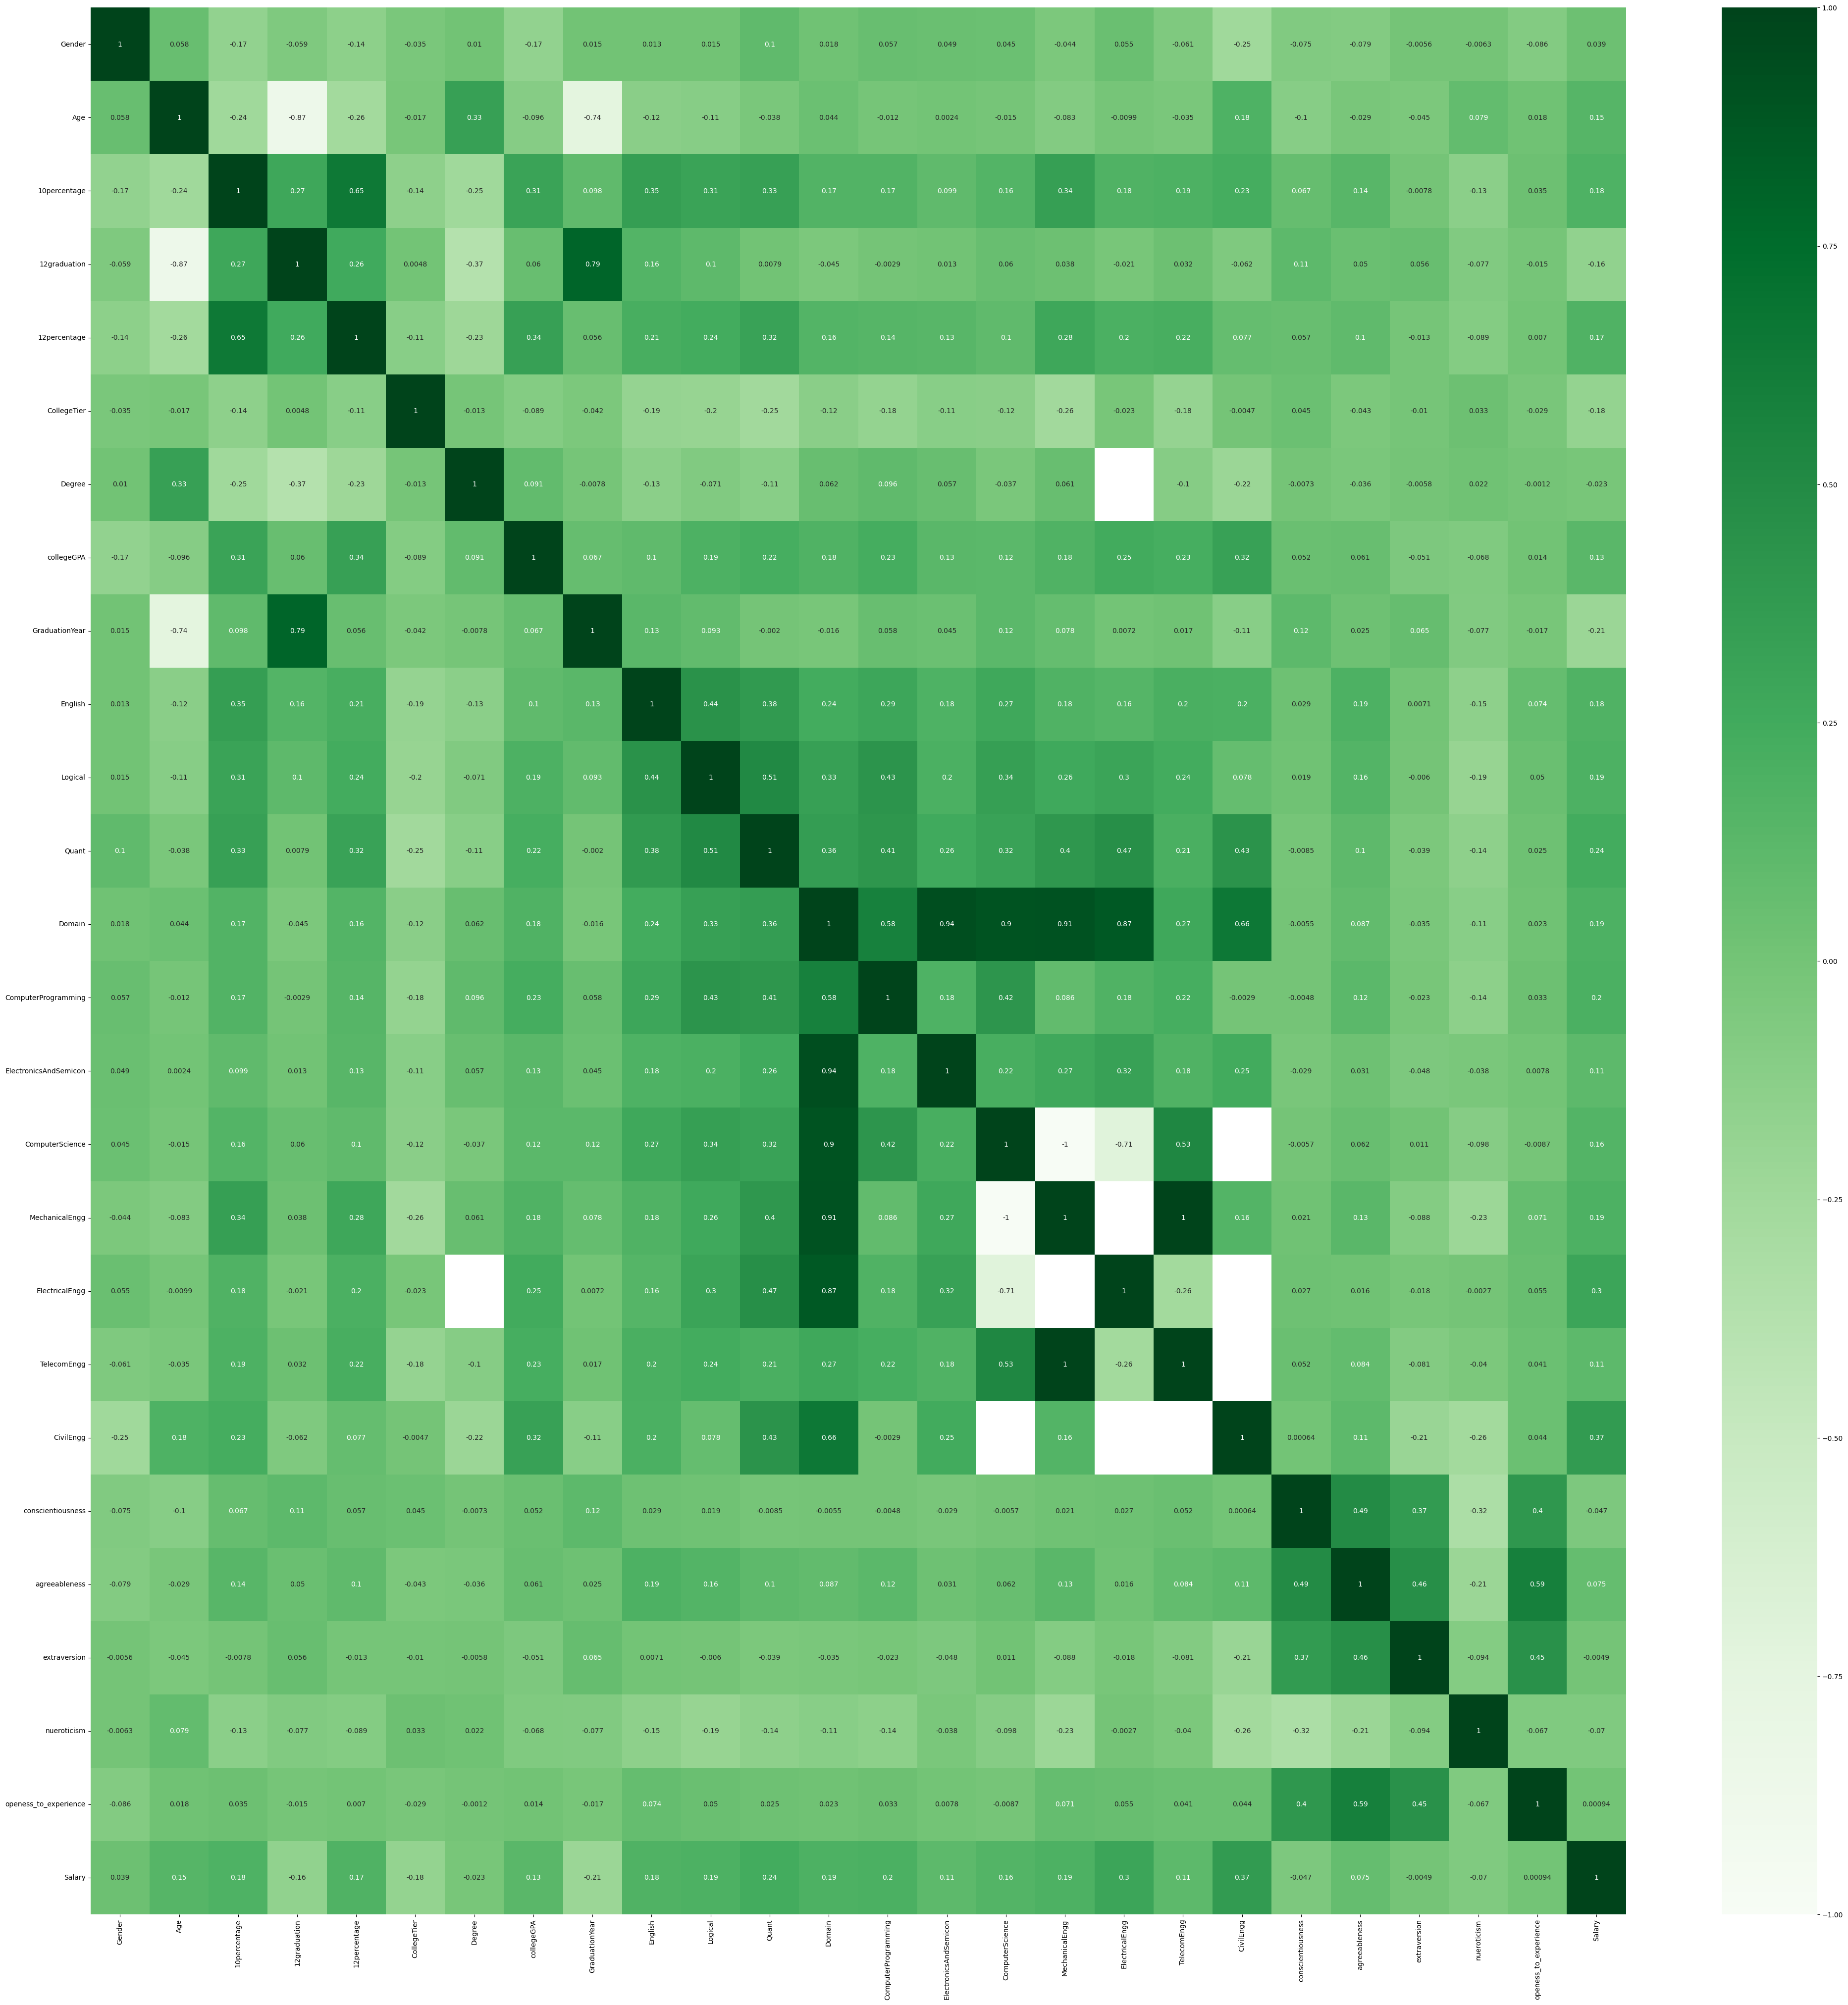

In [89]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

# Machine Learning

In [90]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [91]:
X

,Gender,Age,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0,32,87.80,2009,84.00,1,0,instrumentation and control engineering,73.82,2013,...,NaN,NaN,NaN,NaN,NaN,-0.1590,0.3789,1.2396,0.14590,0.2889
1,1,33,57.00,2010,64.50,2,0,computer science & engineering,65.00,2014,...,NaN,NaN,NaN,NaN,NaN,1.1336,0.0459,1.2396,0.52620,-0.2859
2,1,33,77.33,2007,85.17,2,0,electronics & telecommunications,61.94,2011,...,NaN,NaN,NaN,260.0,NaN,0.5100,-0.1232,1.5428,-0.29020,-0.2875
3,1,32,84.30,2009,86.00,1,0,computer science & engineering,80.40,2013,...,NaN,NaN,NaN,NaN,NaN,-0.4463,0.2124,0.3174,0.27270,0.4805
4,0,32,82.00,2008,75.00,2,0,biotechnology,64.30,2012,...,NaN,NaN,NaN,NaN,NaN,-1.4992,-0.7473,-1.0697,0.06223,0.1864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0,34,75.00,2005,73.00,2,0,electronics and communication engineering,70.00,2010,...,NaN,NaN,NaN,NaN,NaN,-1.1901,0.9688,-1.0697,1.35490,0.0284
2994,0,31,84.00,2008,77.00,2,0,information technology,75.20,2012,...,NaN,NaN,NaN,NaN,NaN,-0.1082,0.0328,-0.4891,-0.29020,0.5024
2995,1,34,91.40,2006,65.56,2,0,information technology,73.19,2011,...,NaN,NaN,NaN,NaN,NaN,-0.8810,0.1888,-0.3440,0.06230,0.6603
2996,1,34,88.64,2006,65.16,2,0,computer engineering,74.81,2011,...,NaN,NaN,NaN,NaN,NaN,1.4374,1.2808,-0.4891,-1.46537,0.5419


In [92]:
y

0       445000
1       110000
2       255000
3       420000
4       200000
         ...  
2993    120000
2994    120000
2995    385000
2996    530000
2997    200000
Name: Salary, Length: 2998, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=20, random_state=10)

In [94]:
model = SVR(kernel='rbf')

In [96]:
model.fit(X_train, y_train)

ValueError: ignored

In [97]:
y_pred = model.predict(X_test)

ValueError: ignored

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
model.predict([[_, _, _, ........., _]])

In [ ]:
df.columns

In [ ]:
df.Specialization.value_counts()